<a href="https://colab.research.google.com/github/Faisal-Al-Mamun/Car-Detection-from-Video-Files-using-OpenCV/blob/main/Car_Detection_from_Video_Files_using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [1]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

### Loading Car Classifier

In [2]:
# Create our body classifier
car_classifier = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/Dataset/Haarcascades/haarcascade_car.xml')

### Car Detection

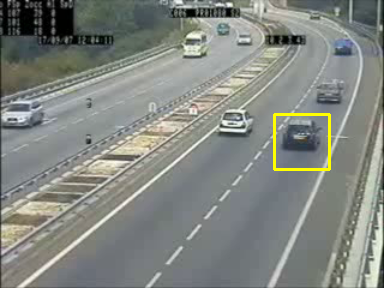

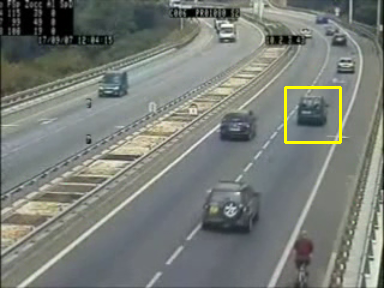

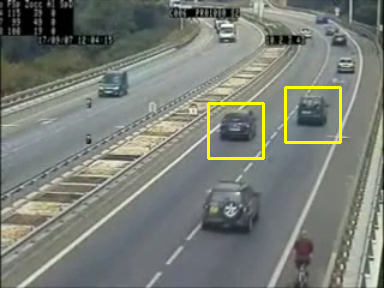

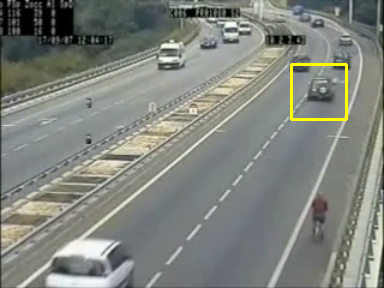

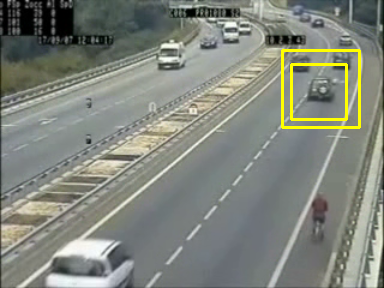

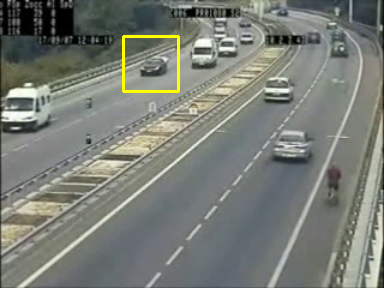

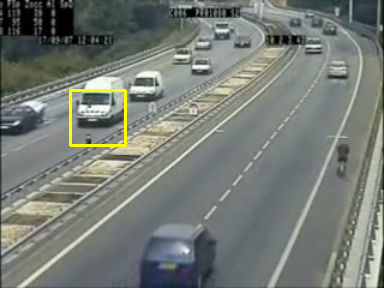

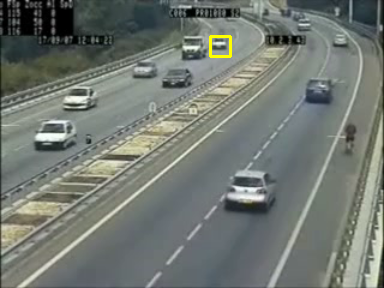

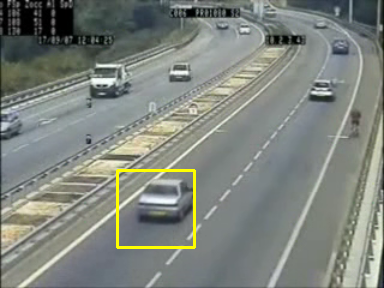

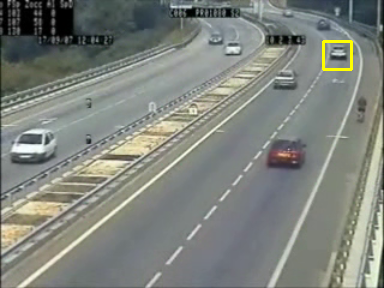

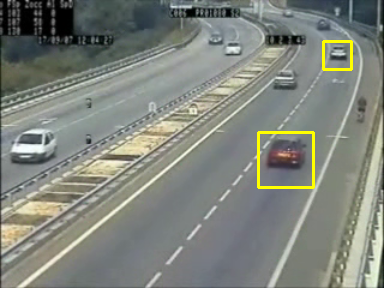

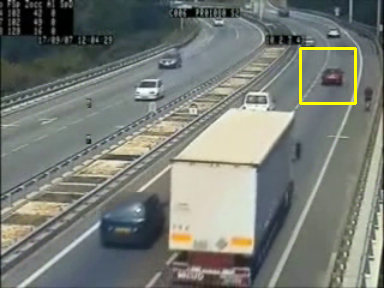

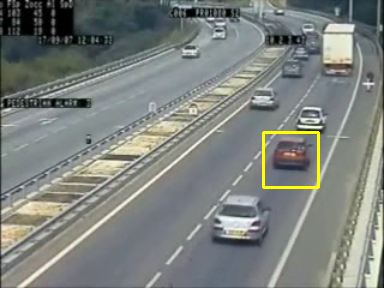

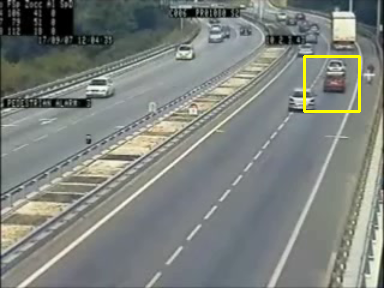

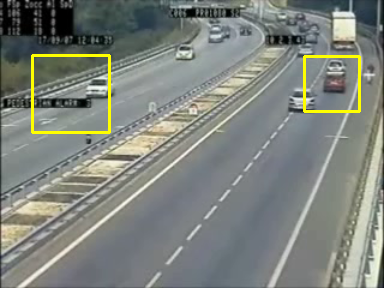

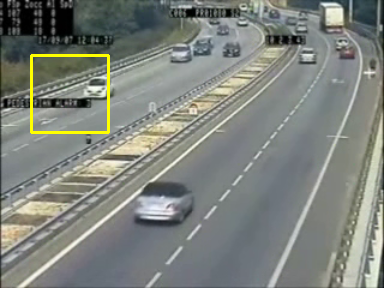

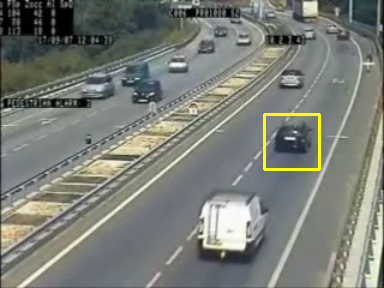

Video ended


In [4]:
# Initiate video capture for video file
cap = cv2.VideoCapture('/content/drive/MyDrive/Colab Notebooks/Dataset/cars.avi')


# Loop once video is successfully loaded
while cap.isOpened():
    
    #time.sleep(.05)
    
    video_cur_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)   # Index of the frame to be decoded/captured next
  
    # Read first frame
    ret, frame = cap.read()

    if ret == True:
        frame = cv2.resize(frame, None, fx=1.2, fy=1.2)
    if ret == False:
        print("Video ended")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
   
    # Pass frame to our car classifier
    cars = car_classifier.detectMultiScale(gray, 1.4, 2)
    
    # Extract bounding boxes for any bodies identified
    for (x,y,w,h) in cars:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
        #cv2.imshow('Cars', frame)
        cv2_imshow(frame)

    cap.set(cv2.CAP_PROP_POS_FRAMES, video_cur_frame + 50) # jump 50 frames
    #if cv2.waitKey(1) == 13: #13 is the Enter Key
    if cv2.waitKey(1) & 0xFF == 27:
      break
        


cap.release()
cv2.destroyAllWindows()